# Precios Vivienda en Boston

En este cuaderno se documenta la construcción de una red neuronal de regresión para predecir los precios de la vivienda en Boston a partir de la base de datos [Boston Housing](https://www.kaggle.com/c/boston-housing).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,mean_squared_error,mean_absolute_error
from sklearn.svm import SVC
from time import sleep
import sys
%matplotlib inline

### 1. Lectura, limpieza y exploración de los datos

In [2]:
df = pd.read_csv('data_housing.csv')

In [3]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


La base cuenta entonces con 404 registros y 12 atributos o características para cada uno de ellos. Al revisar el [diccionario](https://www.kaggle.com/prasadperera/the-boston-housing-dataset) de la base de datos, nos percatamos que la variable 'medv' es la que queremos explicar por medio de la red, pues representa la mediana del valor del predio en miles de dólares. 

### 2. Separación entre train-test y transformación de las variables

Para la construcción de la red, se empleará una estandarización para que todas las variables sigan una distribución normal con media 0 y varianza 1. 

In [5]:
X = df.drop('medv',axis=1)
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43


In [6]:
Y = df['medv']
Y.head()

0    21.7
1    19.6
2    20.3
3    15.4
4    20.5
Name: medv, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

In [8]:
sc = StandardScaler()

In [9]:
X_train = sc.fit_transform(X_train)

In [10]:
X_test = sc.fit_transform(X_test)

In [11]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

### 3. Construcción y entrenamiento de la red

Una vez separados los datos entre el set de entrenamiento y el set de prueba y ya estandarizadas las variables, se procede a la construcción de la red de regresión. La estructura de la red es la siguiente: la capa de entrada corresponde las 13 características de la base de datos obtenidas que se registran en la base de datos, tiene una capas ocultas con 10 neuronas con función de activaci y una capa de salida sin ninguna función de activación, pues el interés de la red recae sobre la predicción del valor númerico.

In [12]:
red = tf.keras.models.Sequential()
red.add(tf.keras.layers.Dense(10, activation = 'relu'))
red.add(tf.keras.layers.Dense(1))

In [13]:
red.compile(optimizer = 'adam', loss = 'mse', metrics = ['mean_squared_error','mean_absolute_error'])

In [14]:
red.fit(X_train, y_train, epochs=1000, verbose = 2)

Train on 323 samples
Epoch 1/1000
323/323 - 1s - loss: 543.5323 - mean_squared_error: 543.5323 - mean_absolute_error: 21.7097
Epoch 2/1000
323/323 - 0s - loss: 535.8286 - mean_squared_error: 535.8286 - mean_absolute_error: 21.5433
Epoch 3/1000
323/323 - 0s - loss: 527.9816 - mean_squared_error: 527.9816 - mean_absolute_error: 21.3726
Epoch 4/1000
323/323 - 0s - loss: 520.0881 - mean_squared_error: 520.0881 - mean_absolute_error: 21.2014
Epoch 5/1000
323/323 - 0s - loss: 512.0232 - mean_squared_error: 512.0232 - mean_absolute_error: 21.0248
Epoch 6/1000
323/323 - 0s - loss: 503.2673 - mean_squared_error: 503.2673 - mean_absolute_error: 20.8355
Epoch 7/1000
323/323 - 0s - loss: 494.4621 - mean_squared_error: 494.4621 - mean_absolute_error: 20.6418
Epoch 8/1000
323/323 - 0s - loss: 484.8845 - mean_squared_error: 484.8845 - mean_absolute_error: 20.4336
Epoch 9/1000
323/323 - 0s - loss: 474.5168 - mean_squared_error: 474.5169 - mean_absolute_error: 20.2045
Epoch 10/1000
323/323 - 0s - loss:

### 4. Desempeño del modelo

A continuación se presenta algunos hallazgos sobre la bondad de ajuste del modelo. En primer lugar la matriz de confusión nos permite observar la precisión del modelo al clasificar los casos de cáncer entre benigno y maligno respecto a los valores reales. La matriz se interpreta de la siguiente manera: para las filas y columnas que coinciden (por ejemplo, fila Beningo, columna Benigno), el valor representado significa la probabilidad de que la red clasificara bien esos registros; cuando la fila y la columna tienen etiquetas distintas, estamos hablando de falsos positivos o falsos negativos, es decir, el modelo se equivocó en la clasificación. En este caso vemos que la probabilidad de que la red clasifique adecuadamente a los pacientes sin cancer es del 100%. Por otra parte, la probabilidad de que la red identifique un caso maligno, y este en verdad sea maligno, es del 95.35%, dejando un 4.65% de probabilidad de que a alguien con cáncer la red lo clasifiqué como sin cáncer. 

In [25]:
y_pred = red.predict(X_test)
y_true = y_test

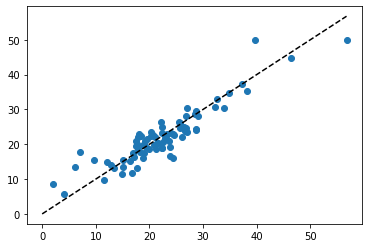

In [26]:
plt.scatter(y_pred,y_true)
plt.plot([0, max(y_pred)], [0, max(y_pred)], color = 'black',linestyle='--')
plt.show()

La gráfica representa el comportamiento de los valores reales de la vivienda en el set de prueba vs. los valores predichos por el modelo calculados a partir de las características de las viviendas en el set de prueba. La línea punteada representa el escenario donde todas las predicciones del modelo coincidirían con los valores reales de las viviendas. Se presentan además dos medidas adicionales para evaluar el desempeño del modelo: el error cuadrático medio y el error absoluto medio.

In [27]:
mean_squared_error(y_true,y_pred)

11.71004966999397

In [28]:
mean_absolute_error(y_true,y_pred)

2.5742471583095594